In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 读取rating.csv，读取的列为：userId，movieId，rating
df_data = pd.read_csv('./data/rating.csv',sep=',',usecols=['userId','movieId','rating'])
# 打印前5行
df_data.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [4]:
# 每个电影id对应的打分次数
movie_rating_count = df_data['movieId'].value_counts()
# 打印前5行
movie_rating_count.head()

296    67310
356    66172
318    63366
593    63299
480    59715
Name: movieId, dtype: int64

0    67310
1    66172
2    63366
3    63299
4    59715
Name: movieId, dtype: int64


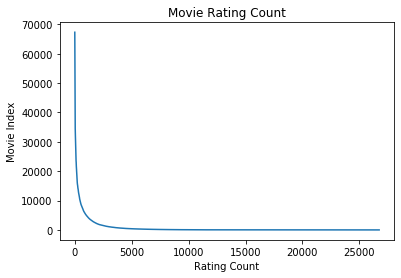

In [11]:
# 深度拷贝一个movie_rating_count
movie_rating_count2  = movie_rating_count.copy()
# 重置索引，方便画图
movie_rating_count2.index = range(movie_rating_count.count())
print(movie_rating_count2.head())
# 横坐标为充值后的索引，纵坐标为打分次数
plt.plot(movie_rating_count2.index,movie_rating_count2)
plt.xlabel('Rating Count')
plt.ylabel('Movie Index')
plt.title('Movie Rating Count')
plt.show()

In [12]:
print(movie_rating_count.tail())
# 数据集中出现的最大的电影id
movie_id_max = movie_rating_count.index.max()
print('最大的商品id：',movie_id_max)

# 总打分数
total_rating_count = sum(movie_rating_count)
print('总打分数是：',total_rating_count)

# 参与评论的电影数量：movie_quantity = len(movie_rating_count)也可以
movie_quantity = movie_rating_count.count()
print('参与评论的电影数量：',movie_quantity)

123607    1
90823     1
123609    1
123613    1
131136    1
Name: movieId, dtype: int64
最大的商品id： 131262
总打分数是： 20000263
参与评论的电影数量： 26744



$$
信息熵：H = -\sum_{i=1}^n p(i)\log p(i)
$$

In [7]:
# 计算信息熵
h = 0
for rating_count in movie_rating_count:
    p = rating_count / total_rating_count
    logp = np.log(p)
    h += -1 * p * logp
print(h)

8.029825085551415



$$
基尼系数：G = \frac {1} {n-1} \sum_{j=1}^n (2j-n-1)p(i_j)
$$

In [8]:
# 计算基尼指数
gini_index = 0
for index in range(len(movie_rating_count)):
    p = movie_rating_count.iloc[index] / total_rating_count
    # j是根据流行度从小到大排列的列表中，第j个电影，而movie_rating_count中是根据打分次数从大到小排列的
    j = movie_quantity - index
    gini_index += (2 * j - movie_quantity -1) * p
gini_index = gini_index / (movie_quantity - 1)
print(gini_index)

0.9029762612602118


In [9]:
# 计算覆盖度，这里把电影id的最大值记为总电影数目，把评分过的电影，记为推荐过的电影
coverage = movie_quantity / movie_id_max
print(coverage)

0.20374518139293932
